## Utilize Linear and Non-Linear (polynomial with degree n) regression models to compare trends for a single state (each member should choose different state) and its counties (top 5 with highest number of cases). Start your data from 2020.06.01 (Monday) to 2021.01.03 (Sunday).

### Import all necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from IPython.display import Image
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### Get the Cases and Death for New Jersey only

In [2]:
cases = pd.read_csv('covid_confirmed_usafacts.csv')

nj_cases = cases[cases["State"] == "NJ"]
selected_date_columns = [col for col in nj_cases.columns if '2020-06-01' <= col <= '2021-01-03']
nj_cases = nj_cases[selected_date_columns]
nj_cases.head()

,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
1804,84,946,854,836,785,782,782,732,732,665,...,1107,1116,1129,1128,1082,1042,1057,1075,1140,1151
1805,2222,2251,2284,2286,2309,2330,2364,2383,2401,2422,...,11395,11585,11688,11765,14480,14717,14920,15143,15420,15596
1806,18302,18333,18376,18408,18463,18492,18512,18538,18573,18667,...,45064,45360,45585,45840,50441,50991,51622,52198,52651,52966
1807,4657,4680,4700,4725,4746,4769,4785,4798,4808,4826,...,19763,20061,20147,20326,22311,22826,23071,23391,23724,23960
1808,6543,6603,6645,6663,6732,6785,6799,6827,6849,6903,...,27150,27459,27618,27739,30373,30726,31088,31395,31809,32006


In [3]:
#convert the cases to a series
daily_cases = []
for col in nj_cases.columns:
    daily_cases.append(nj_cases[col].sum())
daily_cases_data = pd.Series(daily_cases)

In [4]:
deaths = pd.read_csv('covid_deaths_usafacts.csv')
nj_deaths = deaths[deaths["State"] == "NJ"]
selected_date_columns = [col for col in nj_deaths.columns if '2020-06-01' <= col <= '2021-01-03']
nj_deaths = nj_deaths[selected_date_columns]
nj_deaths.head()

,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
1804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1805,159,162,163,164,167,167,167,167,167,168,...,355,357,360,359,364,366,368,370,372,372
1806,1580,1584,1595,1603,1611,1612,1618,1621,1628,1635,...,2276,2277,2280,2282,2300,2312,2318,2330,2333,2335
1807,294,297,302,307,311,314,327,327,334,344,...,606,606,606,606,610,620,624,627,629,630
1808,338,339,346,352,357,364,369,374,381,394,...,780,782,782,785,794,812,818,827,830,833


In [5]:
#convert the deaths to a series
daily_deaths = []
for col in nj_deaths.columns:
    daily_deaths.append(nj_deaths[col].sum())
daily_deaths_data = pd.Series(daily_deaths)

## Utilize Linear and Non-Linear (polynomial with degree 3) regression models to compare trends for the state of North Carolina

In [6]:
days = np.arange(len(daily_cases_data))

# Linear Regression
coeff_cases_linear = np.polyfit(days, daily_cases_data, 1)
cases_linear_predictions = np.polyval(coeff_cases_linear, days)

coeff_deaths_linear = np.polyfit(days, daily_deaths_data, 1)
deaths_linear_predictions = np.polyval(coeff_deaths_linear, days)

# Polynomial Regression
degree = 3
coeff_cases_poly = np.polyfit(days, daily_cases_data, degree)
cases_poly_predictions = np.polyval(coeff_cases_poly, days)

coeff_deaths_poly = np.polyfit(days, daily_deaths_data, degree)
deaths_poly_predictions = np.polyval(coeff_deaths_poly, days)

# Create DataFrame
df = pd.DataFrame({
    'Days': days,
    'Actual Cases': daily_cases_data,
    'Cases Linear Predictions': cases_linear_predictions,
    f'Cases Polynomial (Degree {degree}) Predictions': cases_poly_predictions,
    'Actual Deaths': daily_deaths_data,
    'Deaths Linear Predictions': deaths_linear_predictions,
    f'Deaths Polynomial (Degree {degree}) Predictions': deaths_poly_predictions
})

# Plotting using Plotly Express
fig_cases = px.line(df, x='Days', y=['Actual Cases', 'Cases Linear Predictions',
                                    f'Cases Polynomial (Degree {degree}) Predictions'],
                    labels={'value': 'Number of Cases'}, title='Cases Linear vs. Polynomial Regression')

fig_deaths = px.line(df, x='Days', y=['Actual Deaths', 'Deaths Linear Predictions',
                                      f'Deaths Polynomial (Degree {degree}) Predictions'],
                     labels={'value': 'Number of Deaths'}, title='Deaths Linear vs. Polynomial Regression')

# Update layout
fig_cases.update_layout(width=1000, height=500)
fig_deaths.update_layout(width=1000, height=500)

# Save figures
fig_cases.write_image("fig_cases1.png")
fig_deaths.write_image("fig_deaths1.png")

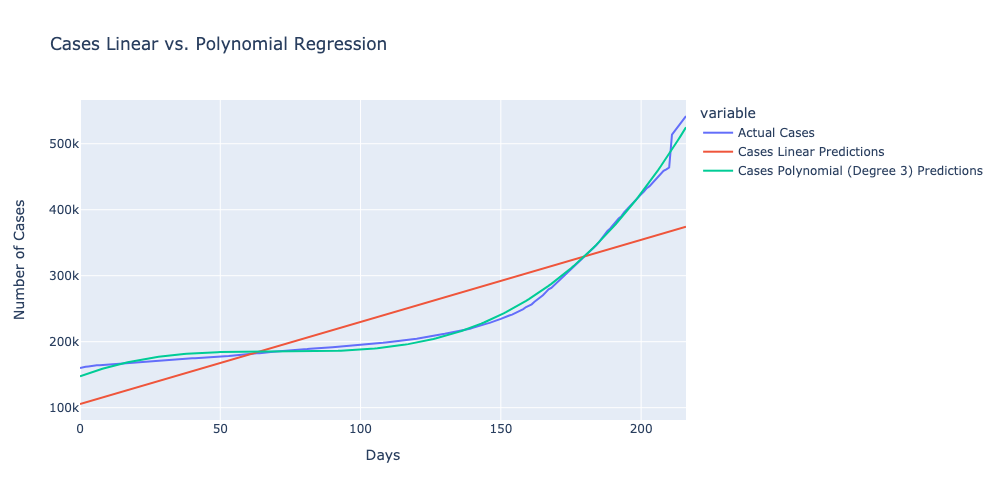

In [7]:
Image(filename="fig_cases1.png")

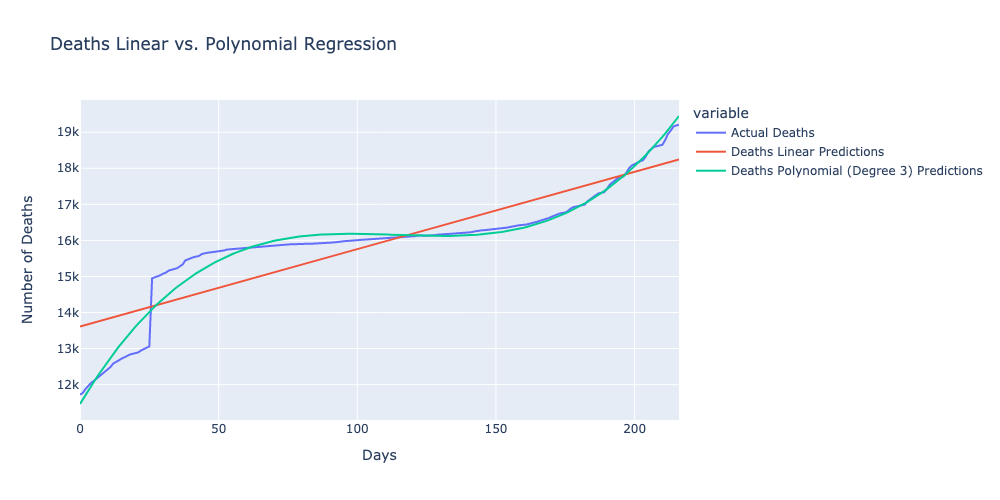

In [8]:
Image(filename="fig_deaths1.png")

### calculate mean, standard deviation, and confidence interval for cases

In [9]:
daily_cases_data = np.array(daily_cases)

mean_daily_cases = np.mean(daily_cases_data)
std_daily_cases = np.std(daily_cases_data)

confidence_level = 0.95

margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * (std_daily_cases / len(daily_cases_data) ** 0.5)

confidence_interval = (mean_daily_cases - margin_of_error, mean_daily_cases + margin_of_error)

print(f"Mean Daily Cases: {mean_daily_cases}")
print(f"Standard Deviation: {std_daily_cases}")
print(f"Confidence Interval ({int(confidence_level * 100)}%): {confidence_interval}")


Mean Daily Cases: 239857.60368663594
Standard Deviation: 92032.41465097011
Confidence Interval (95%): (227612.59659896366, 252102.6107743082)


### calculate mean, standard deviation, and confidence interval for deaths

In [10]:
daily_deaths_data = np.array(daily_deaths)

mean_daily_deaths = np.mean(daily_deaths_data)
std_daily_deaths = np.std(daily_deaths_data)

confidence_level = 0.95

margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * (std_daily_deaths / len(daily_deaths_data) ** 0.5)

confidence_interval = (mean_daily_deaths - margin_of_error, mean_daily_deaths + margin_of_error)

print(f"Mean Daily deaths: {mean_daily_deaths}")
print(f"Standard Deviation: {std_daily_deaths}")
print(f"Confidence Interval ({int(confidence_level * 100)}%): {confidence_interval}")

Mean Daily deaths: 15929.861751152073
Standard Deviation: 1533.206807488086
Confidence Interval (95%): (15725.867014126437, 16133.85648817771)


## Calcluate error using RMSE.(10 points)

In [11]:
# Linear Regression
coeff_cases_linear = np.polyfit(days, daily_cases_data, 1)
cases_linear_predictions = np.polyval(coeff_cases_linear, days)

coeff_deaths_linear = np.polyfit(days, daily_deaths_data, 1)
deaths_linear_predictions = np.polyval(coeff_deaths_linear, days)

# Calculate RMSE
rmse_cases_linear = np.sqrt(mean_squared_error(daily_cases_data, cases_linear_predictions))
rmse_deaths_linear = np.sqrt(mean_squared_error(daily_deaths_data, deaths_linear_predictions))

print(f"RMSE for Cases (Linear Regression): {rmse_cases_linear}")
print(f"RMSE for Deaths (Linear Regression): {rmse_deaths_linear}")

RMSE for Cases (Linear Regression): 49034.32916973638
RMSE for Deaths (Linear Regression): 740.0197842776906


In [12]:
# Polynomial Regression
degree = 3
coeff_cases_poly = np.polyfit(days, daily_cases_data, degree)
cases_poly_predictions = np.polyval(coeff_cases_poly, days)

coeff_deaths_poly = np.polyfit(days, daily_deaths_data, degree)
deaths_poly_predictions = np.polyval(coeff_deaths_poly, days)

# Calculate RMSE
rmse_cases_poly = np.sqrt(mean_squared_error(daily_cases_data, cases_poly_predictions))
rmse_deaths_poly = np.sqrt(mean_squared_error(daily_deaths_data, deaths_poly_predictions))

print(f"RMSE for Cases (Polynomial Regression - Degree {degree}): {rmse_cases_poly}")
print(f"RMSE for Deaths (Polynomial Regression - Degree {degree}): {rmse_deaths_poly}")

RMSE for Cases (Polynomial Regression - Degree 3): 6784.317444979545
RMSE for Deaths (Polynomial Regression - Degree 3): 276.40750507925344


### Perform linear regression analysis for cases

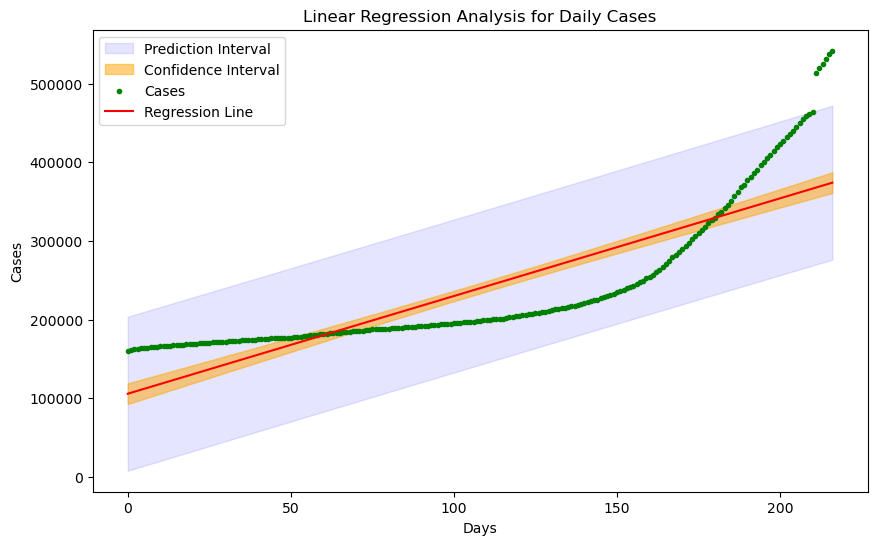

In [13]:
# Create day range
days_cases = range(len(daily_cases_data))

# Fit OLS regression model
model_cases = smf.ols('daily_cases_data ~ days_cases', data=df)
results_cases = model_cases.fit()

# Set confidence level
alpha = 0.05

# Generate predictions and intervals
predictions_cases = results_cases.get_prediction(df).summary_frame(alpha=alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Prediction interval
plt.fill_between(days_cases, predictions_cases['obs_ci_lower'], predictions_cases['obs_ci_upper'], alpha=.1, label='Prediction Interval', color='blue')

# Confidence interval
plt.fill_between(days_cases, predictions_cases['mean_ci_lower'], predictions_cases['mean_ci_upper'], alpha=.5, label='Confidence Interval', color='orange')

# Scatter plot of actual cases
plt.scatter(days_cases, daily_cases_data, label='Cases', marker='.', color='green')

# Regression line
plt.plot(days_cases, predictions_cases['mean'], label='Regression Line', color='red')

# Set labels and legend
plt.xlabel('Days')
plt.ylabel('Cases')
plt.title('Linear Regression Analysis for Daily Cases')
plt.legend()

# Show the plot
plt.show()

### Perform linear regression analysis for deaths

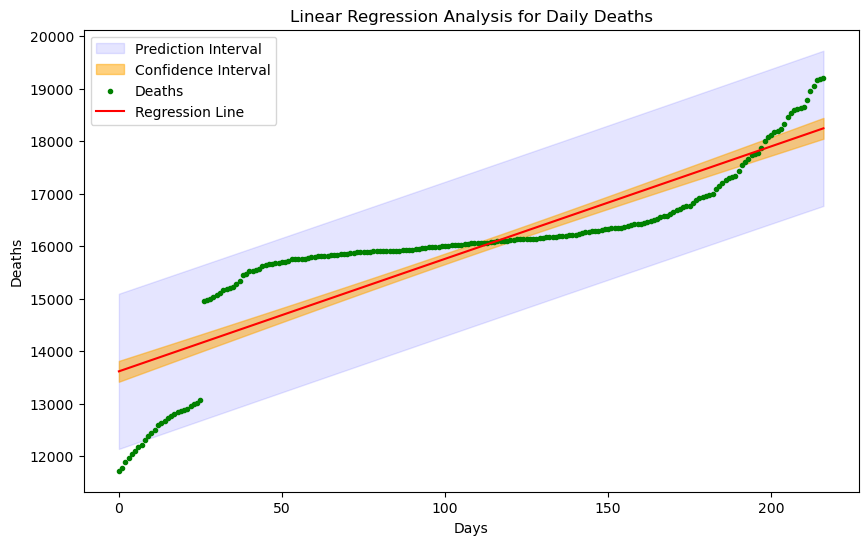

In [14]:
# Create day range
days_deaths = range(len(daily_deaths_data))

# Fit OLS regression model
model_deaths = smf.ols('daily_deaths_data ~ days_deaths', data=df)
results_deaths = model_deaths.fit()

# Set confidence level
alpha = 0.05

# Generate predictions and intervals
predictions_deaths = results_deaths.get_prediction(df).summary_frame(alpha=alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Prediction interval
plt.fill_between(days_deaths, predictions_deaths['obs_ci_lower'], predictions_deaths['obs_ci_upper'], alpha=.1, label='Prediction Interval', color='blue')

# Confidence interval
plt.fill_between(days_deaths, predictions_deaths['mean_ci_lower'], predictions_deaths['mean_ci_upper'], alpha=.5, label='Confidence Interval', color='orange')

# Scatter plot of actual deaths
plt.scatter(days_deaths, daily_deaths_data, label='Deaths', marker='.', color='green')

# Regression line
plt.plot(days_deaths, predictions_deaths['mean'], label='Regression Line', color='red')

# Set labels and legend
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.title('Linear Regression Analysis for Daily Deaths')
plt.legend()

# Show the plot
plt.show()

## Identify which counties are most at risk. Model for top 5 counties with cases within the state of New Jersey and describe their trends. (10 points)

In [15]:
cases = pd.read_csv('covid_confirmed_usafacts.csv')

selected_date_columns = [col for col in cases.columns if '2020-06-01' <= col <= '2021-01-03']

additional_columns = ["County Name", "State"]

selected_columns = additional_columns + selected_date_columns

nj_cases = cases[cases["State"] == "NJ"][selected_columns]

total_cases_per_county = nj_cases.set_index("County Name")[selected_date_columns].sum(axis=1)

top_5_counties_cases = total_cases_per_county.nlargest(5).index.tolist()

print("Top 5 counties with high cases:")
print(top_5_counties_cases)

nj_cases.set_index('County Name', inplace=True)
nj_cases.drop(columns='State', inplace=True)
nj_cases.head()

Top 5 counties with high cases:
['Bergen County ', 'Essex County ', 'Hudson County ', 'Middlesex County ', 'Passaic County ']


,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
County Name,,,,,,,,,,,,,,,,,,,,,
Statewide Unallocated,84,946,854,836,785,782,782,732,732,665,...,1107,1116,1129,1128,1082,1042,1057,1075,1140,1151
Atlantic County,2222,2251,2284,2286,2309,2330,2364,2383,2401,2422,...,11395,11585,11688,11765,14480,14717,14920,15143,15420,15596
Bergen County,18302,18333,18376,18408,18463,18492,18512,18538,18573,18667,...,45064,45360,45585,45840,50441,50991,51622,52198,52651,52966
Burlington County,4657,4680,4700,4725,4746,4769,4785,4798,4808,4826,...,19763,20061,20147,20326,22311,22826,23071,23391,23724,23960
Camden County,6543,6603,6645,6663,6732,6785,6799,6827,6849,6903,...,27150,27459,27618,27739,30373,30726,31088,31395,31809,32006


In [16]:
def extract_daily_cases_data(county_data):
    daily_cases_trend = [county_data[col].values for col in county_data.columns]
    return [item for sublist in daily_cases_trend for item in sublist]

def perform_linear_regression(days, daily_cases_data):
    lr = LinearRegression()
    lr.fit(days.reshape(-1, 1), daily_cases_data)
    return lr.predict(days.reshape(-1, 1))

def perform_polynomial_regression(days, daily_cases_data, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(days.reshape(-1, 1))
    
    pr = LinearRegression()
    pr.fit(X_poly, daily_cases_data)
    return pr.predict(X_poly)

def plot_daily_cases_trend(county_name, days, daily_cases_data, linear_predictions, poly_predictions, degree):
    df = pd.DataFrame({'Days': days,
                       'New Cases': daily_cases_data,
                       'Linear Predictions': linear_predictions,
                       f'Polynomial (Degree {degree}) Predictions': poly_predictions})

    fig = px.line(df, x='Days', y=['New Cases', 'Linear Predictions',
                                    f'Polynomial (Degree {degree}) Predictions'],
                  labels={'y': 'Number of New Cases', 'x': 'Days'},
                  title=f'Daily Cases Trend for {county_name}')
    fig.update_layout(width=1000, height=500)
    
    image_filename = f'daily_cases_trends_{county_name}.png'
    fig.write_image(image_filename)
    
    return image_filename

# Iterate over top 5 counties
for county in top_5_counties_cases:
    county_data = nj_cases.loc[nj_cases.index == county]
    daily_cases_data = extract_daily_cases_data(county_data)
    days = np.arange(len(daily_cases_data))

    linear_predictions = perform_linear_regression(days, daily_cases_data)
    poly_predictions = perform_polynomial_regression(days, daily_cases_data, degree)

    image_filename = plot_daily_cases_trend(county, days, daily_cases_data, linear_predictions, poly_predictions, degree)


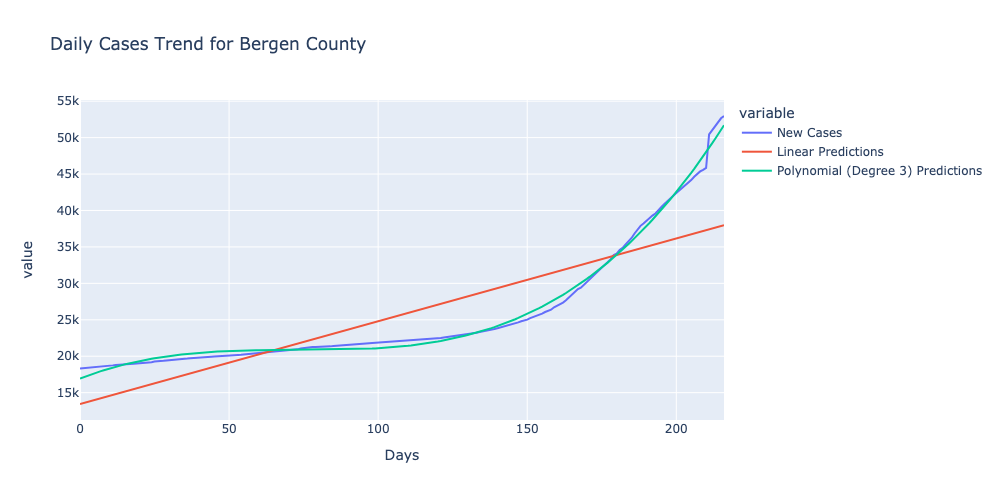

In [17]:
Image(filename="daily_cases_trends_Bergen County .png")

#### Observation for Bergen County: Starting June 2020 the cases were only about 14,000, but over time the COVID-19 cases increased day by day. By January 2021, there were almost 53,000 COVID-19 cases in Bergen County.

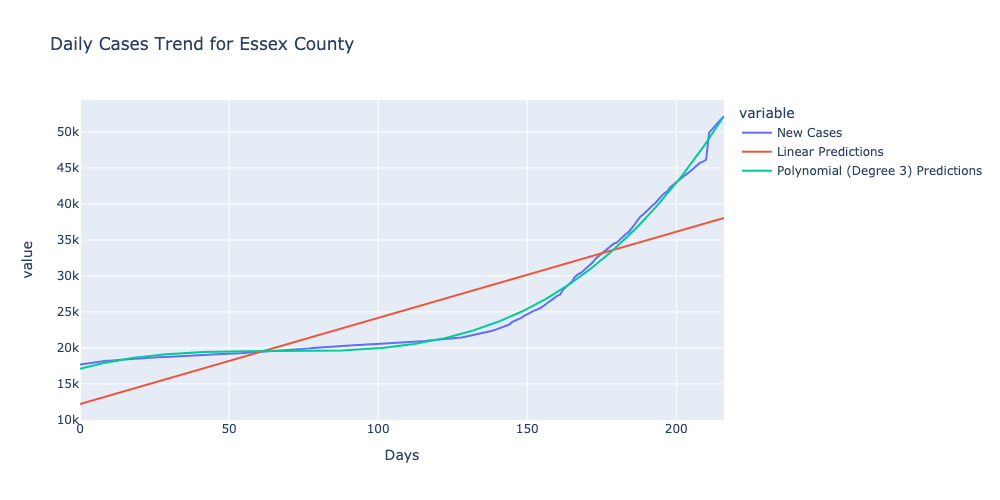

In [18]:
Image(filename="daily_cases_trends_Essex County .png")

#### Observation for Essex County: Starting June 2020 the cases were only about 17,500, but over time cases increased. By January 2021, there were almost 53,000 cases 

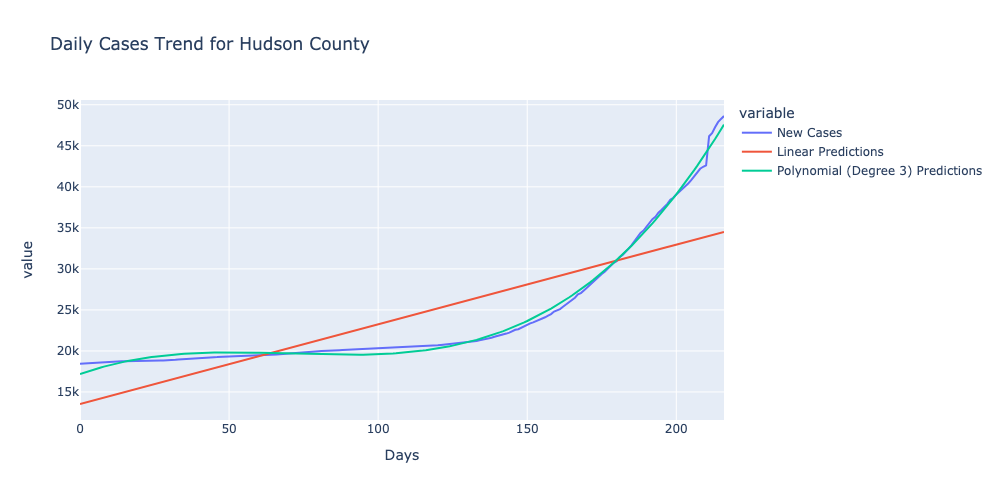

In [19]:
Image(filename="daily_cases_trends_Hudson County .png")

#### Observation for Hudson County: Starting June 2020 the cases were only about 17,500, but over time cases increased. By January 2021, there were almost 48,000 cases 

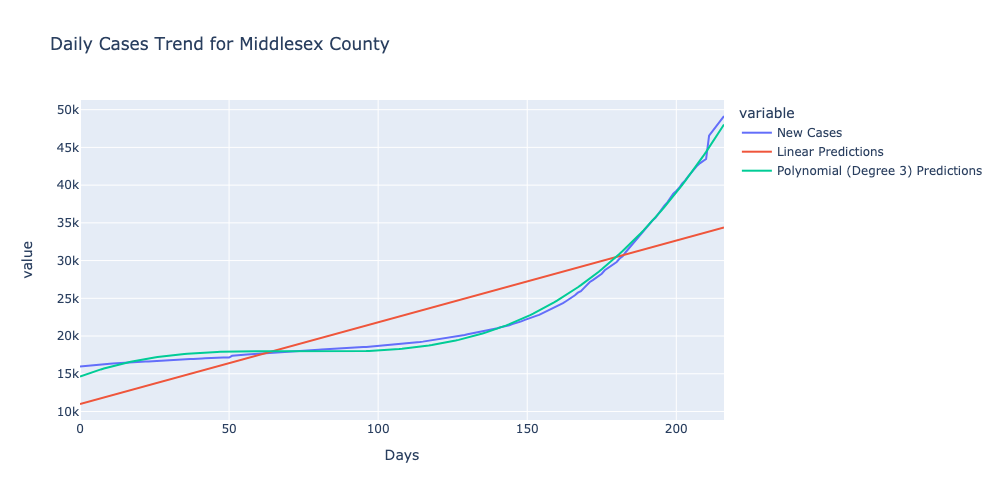

In [20]:
Image(filename="daily_cases_trends_Middlesex County .png")

#### Observation for Middlesex County: Starting June 2020 the cases were only about 16,000, but over time cases increased. By January 2021, there were almost 49,000 cases 

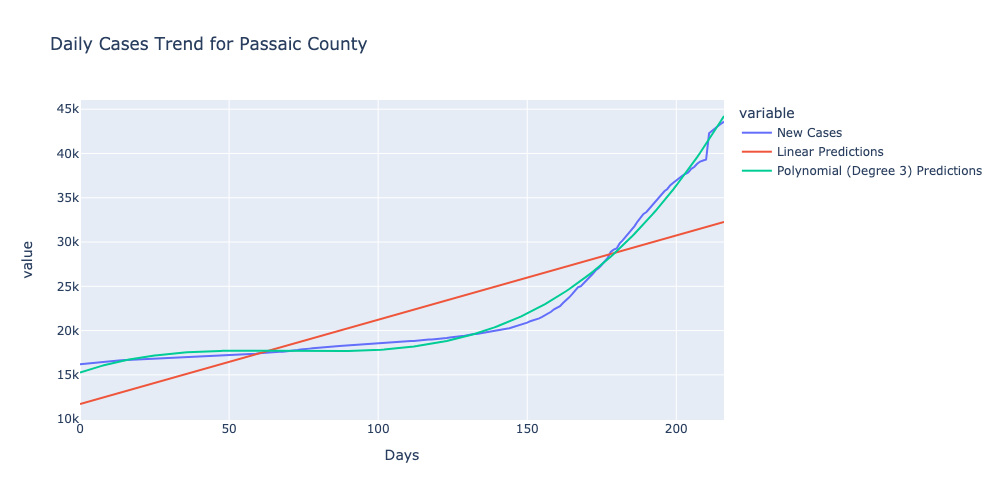

In [21]:
Image(filename="daily_cases_trends_Passaic County .png")

#### Observation for Passaic County: Starting June 2020 the cases were only about 16,000, but over time cases increased. By January 2021, there were almost 44,000 cases 

## Perform hypothesis tests on questions identified in Stage III.(30 Points)

#### Testing Hypothesis 1-3 

In [22]:
employment_jul_aug_sep = pd.read_excel('allhlcn203.xlsx')
nj_employment_jul_aug_sep = employment_jul_aug_sep[employment_jul_aug_sep["St Name"] == "New Jersey"]
nj_employment_jul_aug_sep = nj_employment_jul_aug_sep[["July Employment", "August Employment", "September Employment"]]

employment_oct_nov_dec = pd.read_excel('allhlcn204.xlsx')
nj_employment_oct_nov_dec = employment_oct_nov_dec[employment_oct_nov_dec["St Name"] == "New Jersey"]
nj_employment_oct_nov_dec = nj_employment_oct_nov_dec[["October Employment", "November Employment", "December Employment"]]

In [23]:
arr = []
for col in nj_employment_jul_aug_sep.columns:
    arr.append(nj_employment_jul_aug_sep[col].sum())
    
for col in nj_employment_oct_nov_dec.columns:
    arr.append(nj_employment_oct_nov_dec[col].sum())
    
nj_employment_data = pd.Series(arr)

In [24]:
daily_cases_nj = []
for col in nj_cases.columns:
    daily_cases_nj.append(nj_cases[col].sum())
daily_cases_nj_data = pd.Series(daily_cases_nj)

### Hypothesis 1

#### Null Hypothesis (H0): There is no correlation between employment levels in New Jersey and the daily number of COVID-19 cases.
#### Alternative Hypothesis (H1): There is a significant correlation between employment levels in New Jersey and the daily number of COVID-19 cases.

In [25]:
nj_employment_jul = nj_employment_jul_aug_sep["July Employment"].sum()
nj_employment_aug = nj_employment_jul_aug_sep["August Employment"].sum()
nj_employment_sep = nj_employment_jul_aug_sep["September Employment"].sum()

nj_employment_oct = nj_employment_oct_nov_dec["October Employment"].sum()
nj_employment_nov = nj_employment_oct_nov_dec["November Employment"].sum()
nj_employment_dec = nj_employment_oct_nov_dec["December Employment"].sum()

months = ["July", "August", "September", "October", "November", "December"]
employment_sums = [nj_employment_jul, nj_employment_aug, nj_employment_sep, nj_employment_oct, nj_employment_nov, nj_employment_dec]

data = {
    'Jul 2020 - Dec 2020': months,
    'Employment': employment_sums
}

fig = px.line(data, x='Jul 2020 - Dec 2020', y='Employment', title='Monthly Employment from Jul 2020 - Dec 2020')
fig.update_layout(width=1000, height=500)
fig.write_image(f'employment.png')

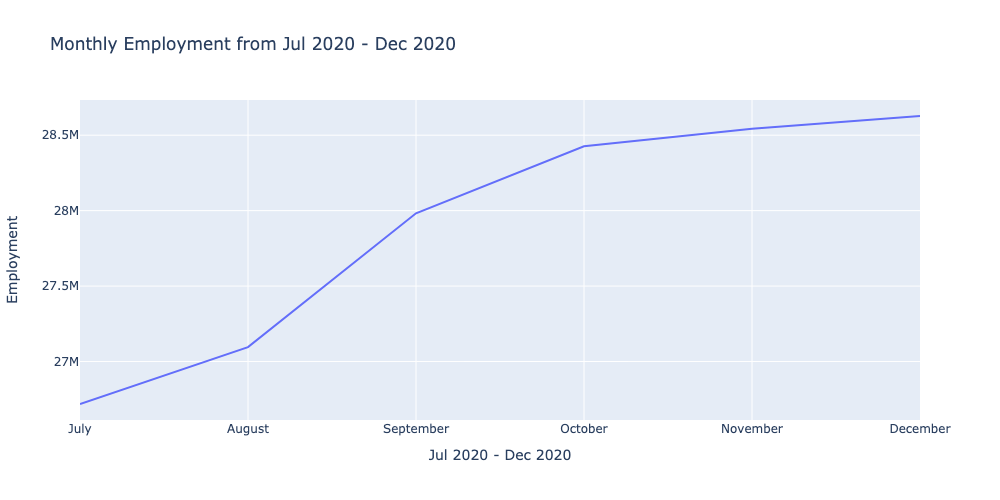

In [26]:
Image(filename="employment.png")

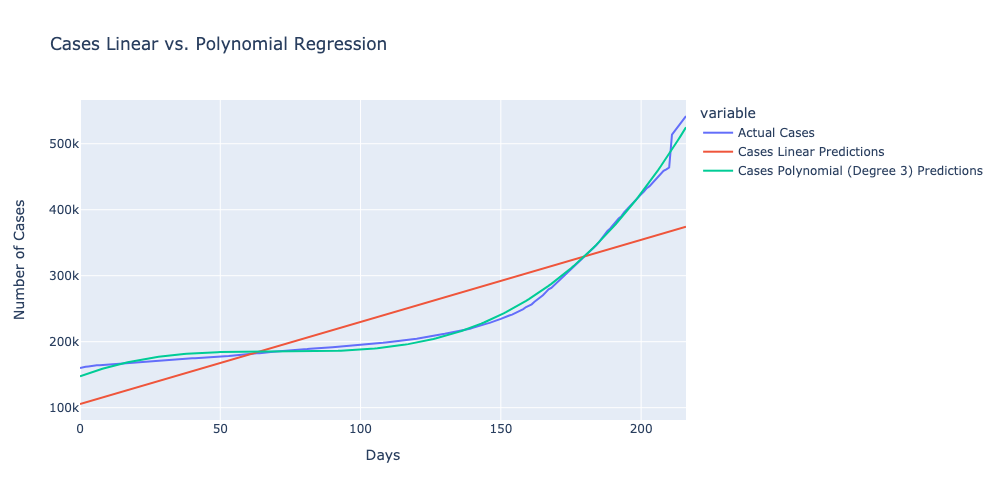

In [27]:
Image(filename="fig_cases1.png")

In [28]:
df = pd.DataFrame({'Employment': nj_employment_data, 'DailyCases': daily_cases_nj_data})
df = df.replace([np.inf, -np.inf], np.nan).dropna()
correlation_coefficient, p_value = pearsonr(df['Employment'], df['DailyCases'])

print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

Correlation Coefficient: 0.94


The correlation coefficient of .94 supports the Hypothesis that "Significant correlation between employment levels in New Jersey and the daily number of COVID-19 cases." by showing a positive correlation between the rising employment and increasing COVID-19 cases, hence we reject the Null hypothesis.

### Hypothesis 2:

#### Null Hypothesis(H0): There is no significant difference in average employment between months with high COVID-19 cases and months with low COVID-19 cases.
#### Alternative Hypothesis(H1): There is a significant difference in average employment between months with high COVID-19 cases and months with low COVID-19 cases.


In [29]:
# Hypothesis Test: Two-sample t-test.

from scipy.stats import ttest_ind

# Convert daily_cases_data to a Pandas Series
daily_cases_series = pd.Series(daily_cases_data)

# Categorize months into high and low COVID-19 cases
high_cases_months = daily_cases_series[daily_cases_series > daily_cases_series.mean()]
low_cases_months = daily_cases_series[daily_cases_series <= daily_cases_series.mean()]

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(high_cases_months, low_cases_months)

# Check the p-value to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


Reject the null hypothesis. There is a significant difference.


### Hypothesis 3:

#### Null Hypothesis (H0): There is no significant association between employment status and COVID-19 cases.
#### Alternative Hypothesis (H1): There is a significant association between employment status  and COVID-19 cases.


In [30]:
# Hypothesis Test: Chi-square test.

from scipy.stats import chi2_contingency

# Convert daily_cases_data to a Pandas Series
daily_cases_series = pd.Series(daily_cases_data)

# Create a contingency table
contingency_table = pd.crosstab((daily_cases_series > daily_cases_series.mean()).astype(int), columns="count")

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Check the p-value to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

Fail to reject the null hypothesis. There is no significant difference.
